<a href="https://colab.research.google.com/github/depresssed-kid/delivery-time/blob/main/delivery_time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
#!pip uninstall -y scikit-learn
#!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.3.1
Uninstalling scikit-learn-1.3.1:
  Successfully uninstalled scikit-learn-1.3.1
  Using cached scikit_learn-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)


In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing  import OrdinalEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import seaborn as sns
import xgboost as xg

In [20]:
time = pd.read_csv('Food_Delivery_Times.csv')
time.pop('Order_ID')
time.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,19.03,Clear,Low,Morning,Bike,16,5.0,68


In [21]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Distance_km             1000 non-null   float64
 1   Weather                 970 non-null    object 
 2   Traffic_Level           970 non-null    object 
 3   Time_of_Day             970 non-null    object 
 4   Vehicle_Type            1000 non-null   object 
 5   Preparation_Time_min    1000 non-null   int64  
 6   Courier_Experience_yrs  970 non-null    float64
 7   Delivery_Time_min       1000 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 62.6+ KB


In [22]:
time.isna().sum()

,0
Distance_km,0
Weather,30
Traffic_Level,30
Time_of_Day,30
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,30
Delivery_Time_min,0


In [23]:
time['Weather'] = time['Weather'].fillna(time['Weather'].mode()[0])
time['Traffic_Level'] = time['Traffic_Level'].fillna(time['Traffic_Level'].mode()[0])
time['Time_of_Day'] = time['Time_of_Day'].fillna(time['Time_of_Day'].mode()[0])
time['Courier_Experience_yrs'] = time['Courier_Experience_yrs'].fillna(time['Courier_Experience_yrs'].median())
time.isna().sum()

,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time_min,0


array([[<Axes: title={'center': 'Distance_km'}>,
        <Axes: title={'center': 'Preparation_Time_min'}>],
       [<Axes: title={'center': 'Courier_Experience_yrs'}>,
        <Axes: title={'center': 'Delivery_Time_min'}>]], dtype=object)

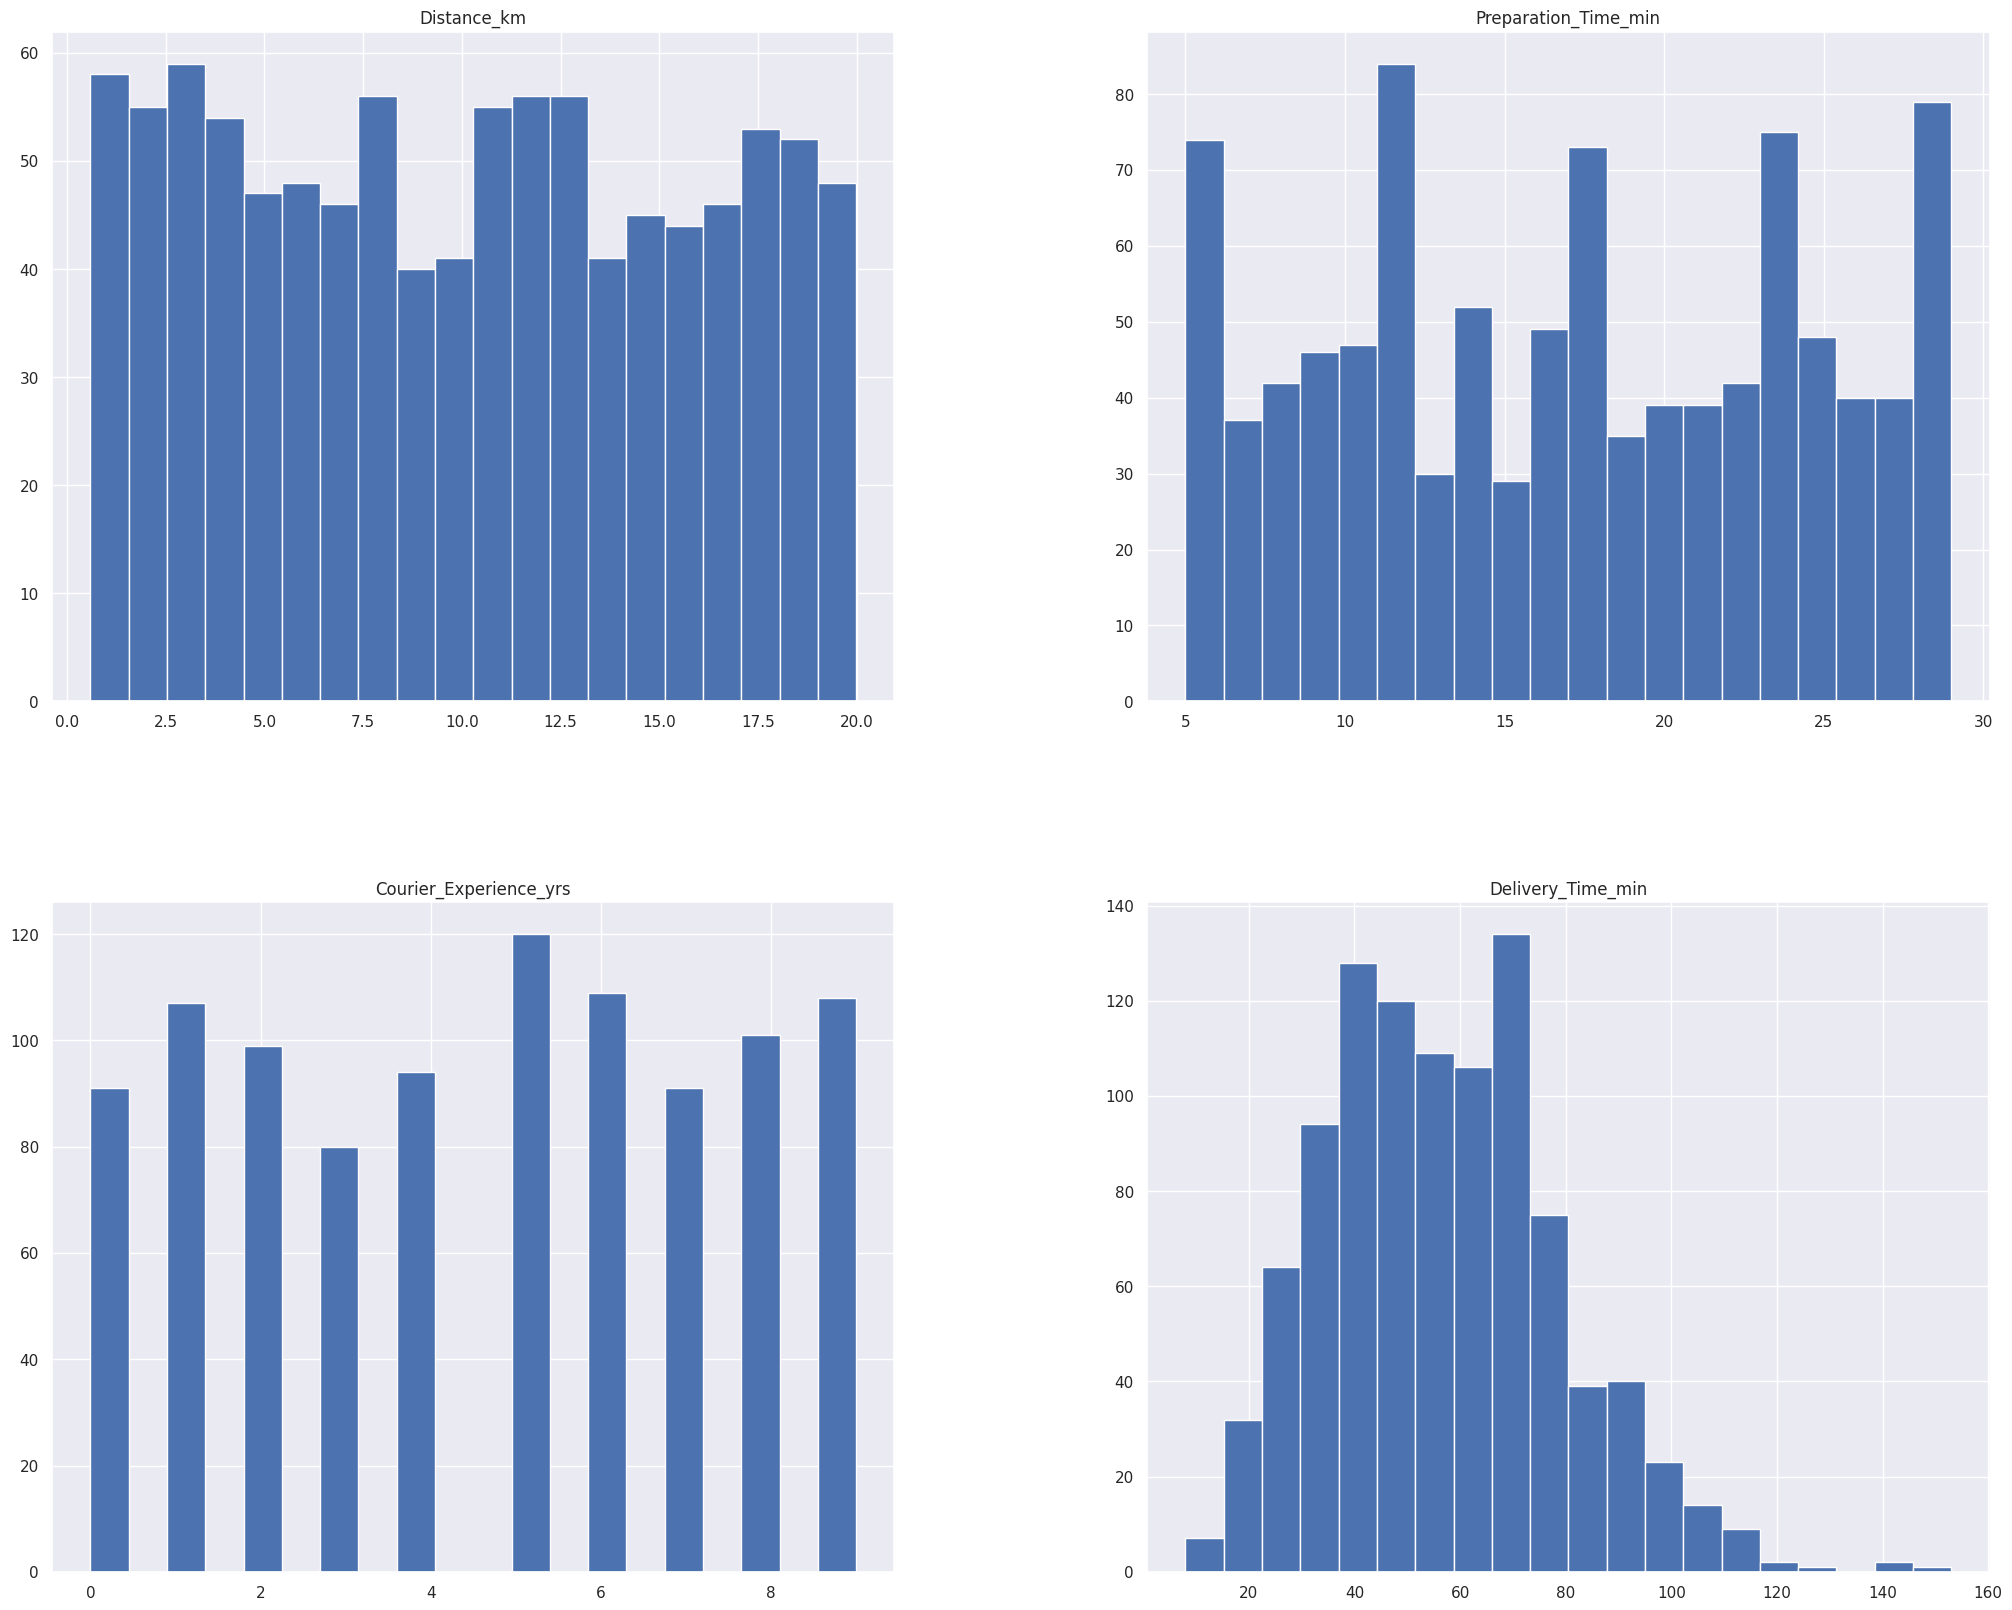

In [24]:
time.hist(bins=20, figsize=(25, 20))

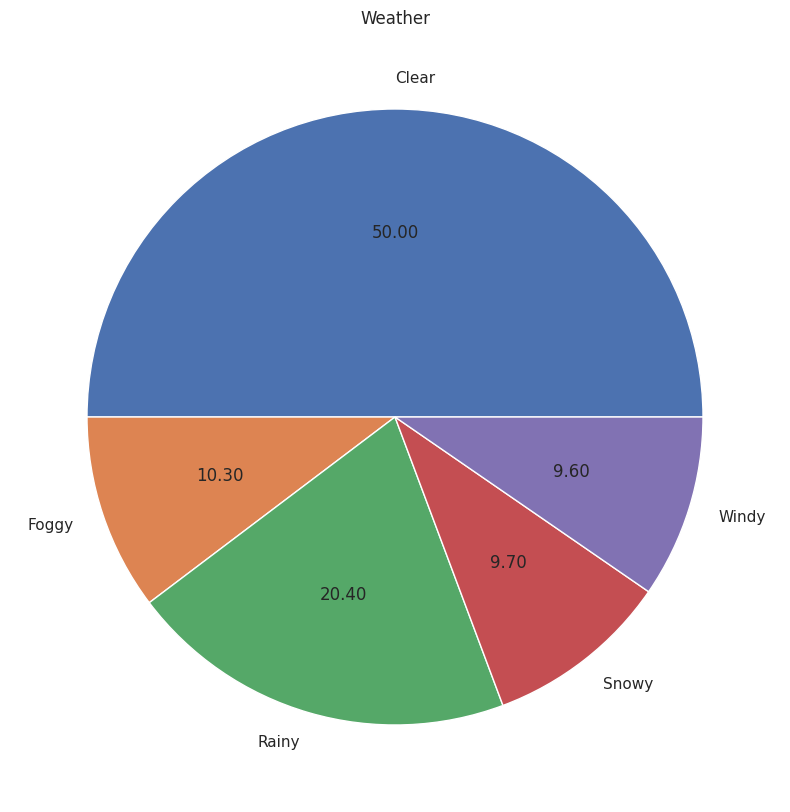

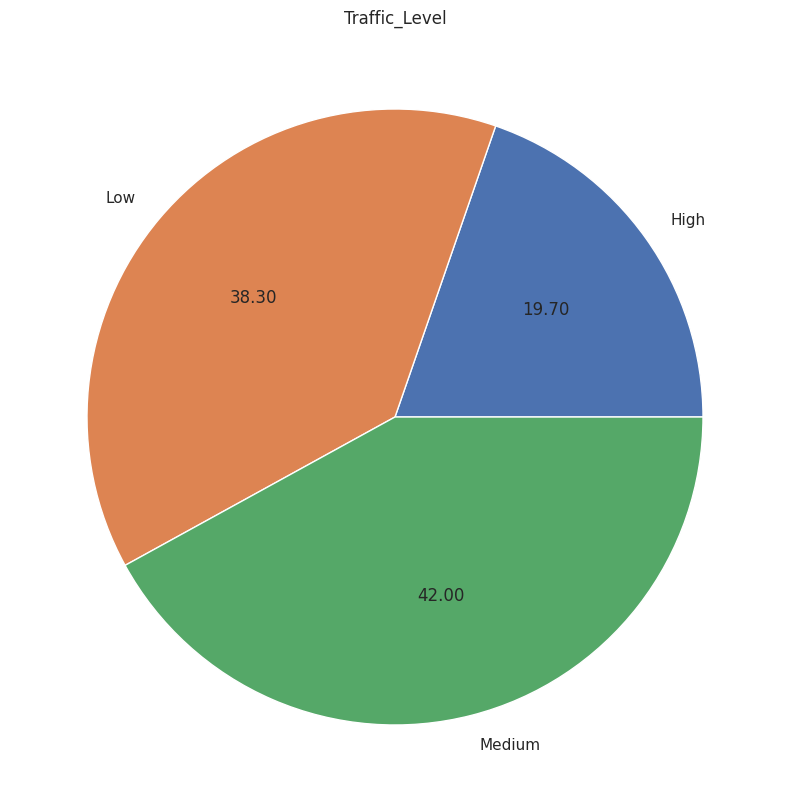

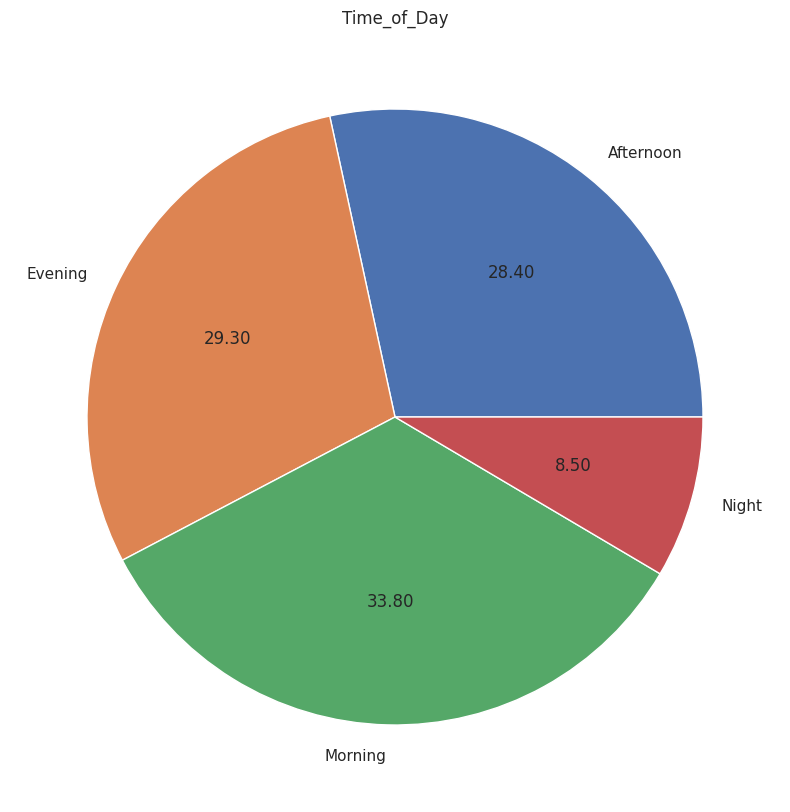

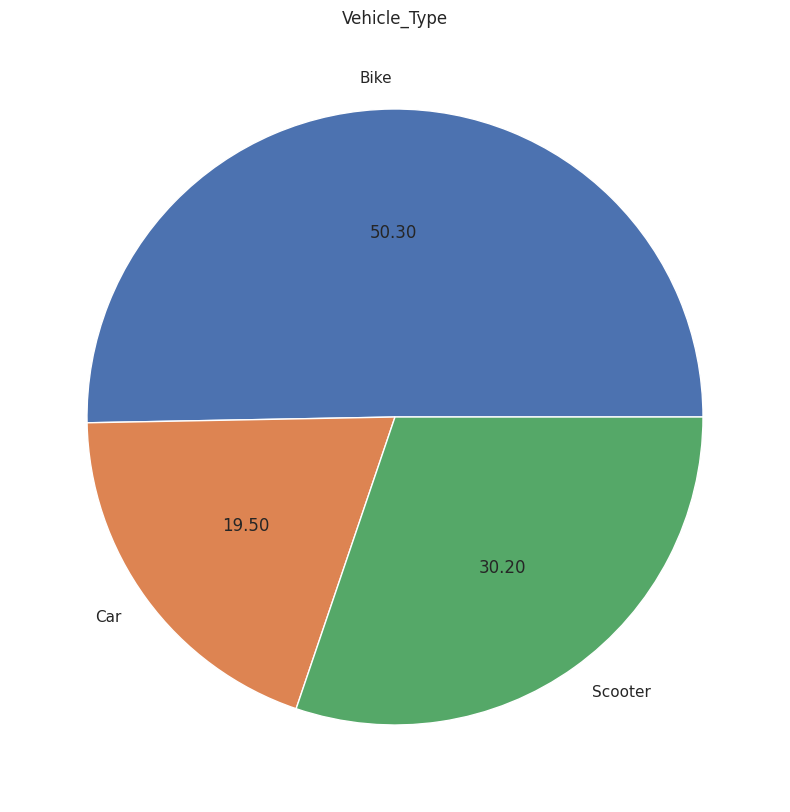

In [25]:
cat_cols = ['Weather','Traffic_Level','Time_of_Day','Vehicle_Type']
for col in cat_cols:
  plt.title(col)
  time.groupby(col).size().plot(kind='pie', autopct='%.2f')
  plt.show()


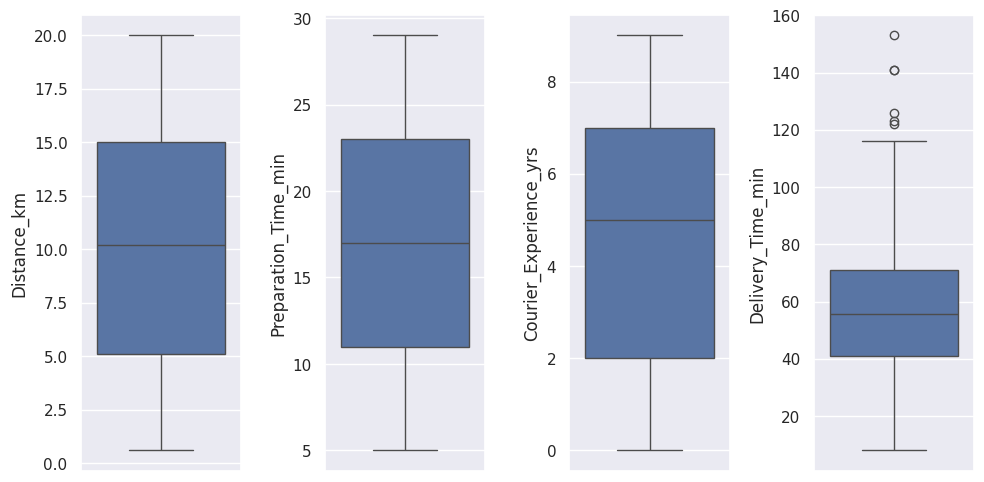

In [26]:
fig, axs = plt.subplots(1, 4, figsize=(10, 5))
axs = axs.flatten()
for i, col in enumerate(time.columns.drop(cat_cols)):
    sns.boxplot( y=time[col], data=time, ax=axs[i])
plt.tight_layout()
plt.show()

In [27]:
time_of_day = ['Morning', 'Afternoon', 'Evening', 'Night']
traff = ['Low', 'Medium','High']
time_ordin_enc = OrdinalEncoder(categories=[time_of_day])
traff_ordin_enc = OrdinalEncoder(categories=[traff])
time['Time_of_Day'] = time_ordin_enc.fit_transform(time[['Time_of_Day']])
time['Traffic_Level'] = traff_ordin_enc.fit_transform(time[['Traffic_Level']])
time.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,7.93,Windy,0.0,1.0,Scooter,12,1.0,43
1,16.42,Clear,1.0,2.0,Bike,20,2.0,84
2,9.52,Foggy,0.0,3.0,Scooter,28,1.0,59
3,7.44,Rainy,1.0,1.0,Scooter,5,1.0,37
4,19.03,Clear,0.0,0.0,Bike,16,5.0,68


In [28]:
time = pd.get_dummies(time, columns=['Weather',  'Vehicle_Type'], drop_first=True)
time.head()

,Distance_km,Traffic_Level,Time_of_Day,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min,Weather_Foggy,Weather_Rainy,Weather_Snowy,Weather_Windy,Vehicle_Type_Car,Vehicle_Type_Scooter
0,7.93,0.0,1.0,12,1.0,43,False,False,False,True,False,True
1,16.42,1.0,2.0,20,2.0,84,False,False,False,False,False,False
2,9.52,0.0,3.0,28,1.0,59,True,False,False,False,False,True
3,7.44,1.0,1.0,5,1.0,37,False,True,False,False,False,True
4,19.03,0.0,0.0,16,5.0,68,False,False,False,False,False,False


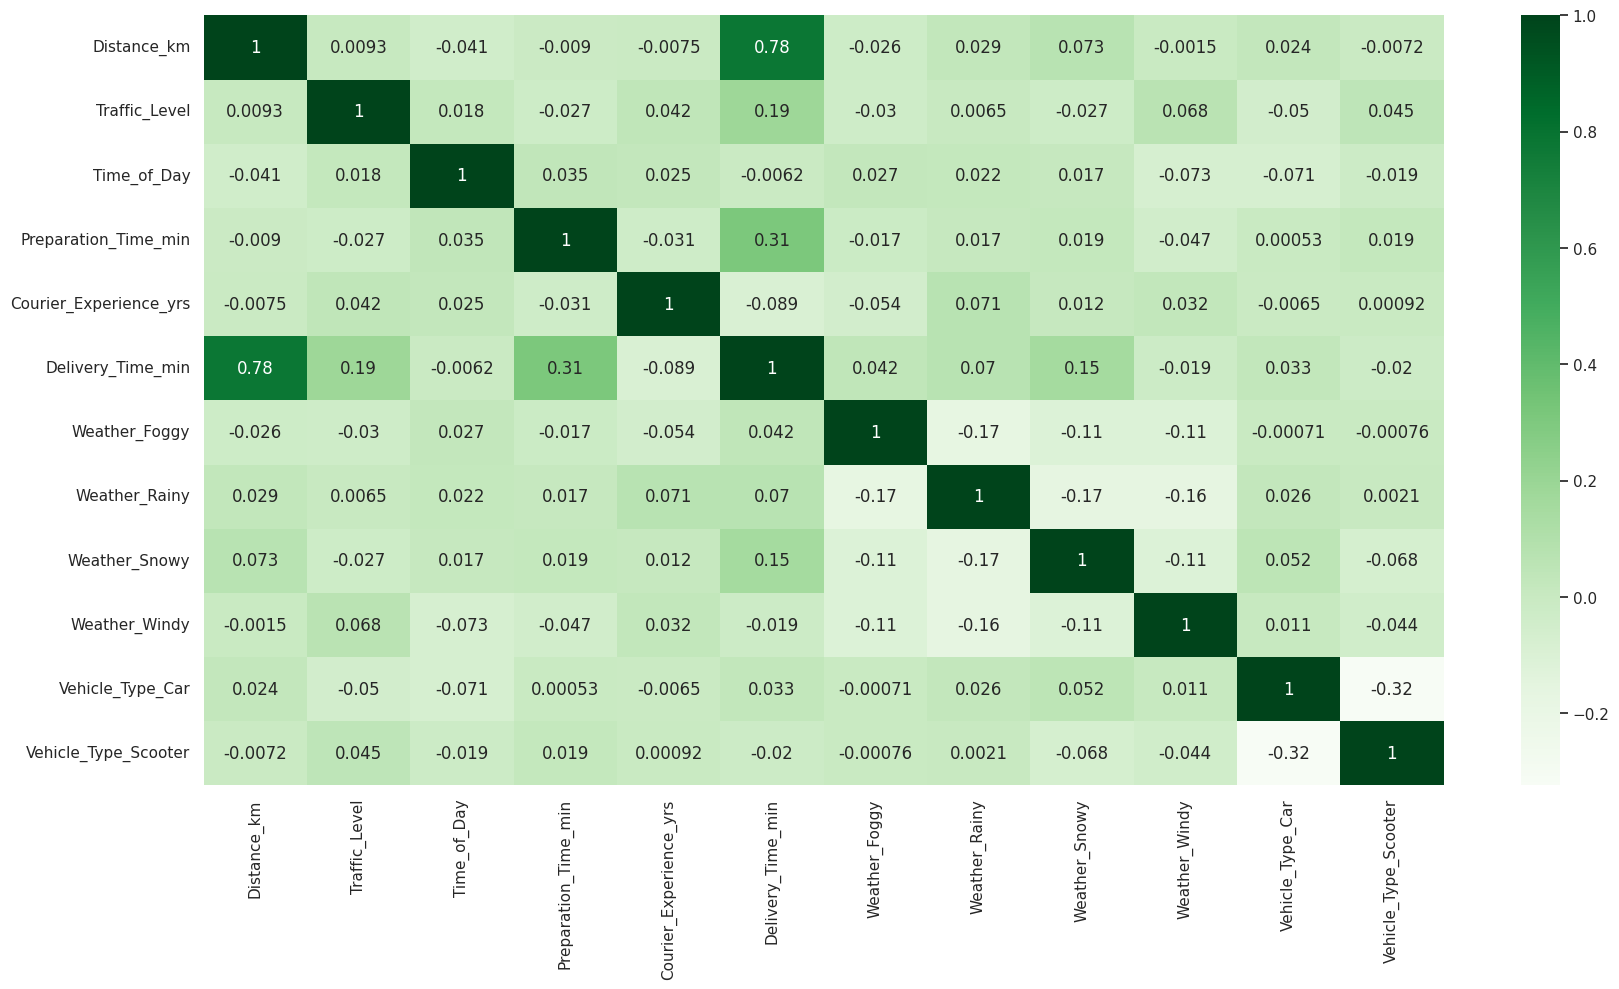

In [29]:
correlation_matrix = time.corr()
sns.heatmap(correlation_matrix,
            xticklabels=correlation_matrix.columns.values,
            yticklabels=correlation_matrix.columns.values,  cmap="Greens", annot=True)
sns.set(rc={"figure.figsize": (20, 10)})
plt.show()
#почему-то нужно запустить еще  раз чтобы нормальный размер выводился

In [30]:
X = time.drop('Delivery_Time_min', axis=1)
y = time['Delivery_Time_min']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
len(X_train), len(y_train)

(800, 800)

In [31]:
reg = LinearRegression().fit(X_train,y_train)
reg_pred = reg.predict(X_test)
print('linear regression')
print('MAE:', mean_absolute_error(y_test,reg_pred))
print('R^2:', r2_score(y_test, reg_pred))

linear regression
MAE: 5.838996713001173
R^2: 0.8284311849886887


In [32]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'reg_alpha': [0, 0.5],
    'reg_lambda': [0, 0.5]
}
xgb = xg.XGBRegressor(objective='reg:squarederror',)
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid)
grid_search.fit(X_train,y_train)

print("best parameters:", grid_search.best_params_)

best parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'reg_alpha': 0.5, 'reg_lambda': 0.5}


In [33]:
xgb_r = xg.XGBRegressor(**grid_search.best_params_)
xgb_r.fit(X_train,y_train)
xgb_r_pred = xgb_r.predict(X_test)
print('xgboost')
print('MAE:', mean_absolute_error(y_test,xgb_r_pred))
print('R^2:', r2_score(y_test, xgb_r_pred))

xgboost
MAE: 6.7315767383575436
R^2: 0.7918599705019791
